In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
prediction_lstm = pd.read_csv('lstm.csv')
prediction_tcn = pd.read_csv('tcn.csv')
prediction_arima = pd.read_csv('arima.csv')

In [43]:
weight_lstm = 0.2
weight_tcn = 0.5
weight_arima = 0.3

In [55]:
ensemble_predictions = (weight_lstm * prediction_lstm +
                        weight_arima * prediction_arima +
                        weight_tcn * prediction_tcn)

df = ensemble_predictions

del ensemble_predictions['Unnamed: 0']
ensemble_predictions

,0
0,25617.80682
1,25635.46273
2,25625.97842
3,25625.74391
4,25678.75661
5,25798.92027
6,25909.60169
7,26064.32814
8,26093.34419
9,26007.07762


In [56]:
import yfinance as yf
from sklearn.metrics import mean_absolute_error, mean_squared_error

raw_actual = yf.download(ticker, start='2024-10-01', end='2024-10-30')


[*********************100%***********************]  1 of 1 completed


In [57]:
raw_actual.dropna(inplace=True)
actual_values = np.array(raw_actual['Close'])

actual_values

array([[25796.90039062],
       [25250.09960938],
       [25014.59960938],
       [24795.75      ],
       [25013.15039062],
       [24981.94921875],
       [24998.44921875],
       [24964.25      ],
       [25127.94921875],
       [25057.34960938],
       [24971.30078125],
       [24749.84960938],
       [24854.05078125],
       [24781.09960938],
       [24472.09960938],
       [24435.5       ],
       [24399.40039062],
       [24180.80078125],
       [24339.15039062],
       [24466.84960938]])

In [58]:
mape = np.mean(np.abs((actual_values - ensemble_predictions) / actual_values)) * 100

In [59]:
mae = mean_absolute_error(actual_values, ensemble_predictions)

In [60]:
rmse = np.sqrt(mean_squared_error(actual_values, ensemble_predictions))

In [62]:
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Percentage Error (MAPE): 3.68%
Mean Absolute Error (MAE): 908.74
Root Mean Squared Error (RMSE): 955.25


In [65]:
df.head()

,0
0,25617.80682
1,25635.46273
2,25625.97842
3,25625.74391
4,25678.75661


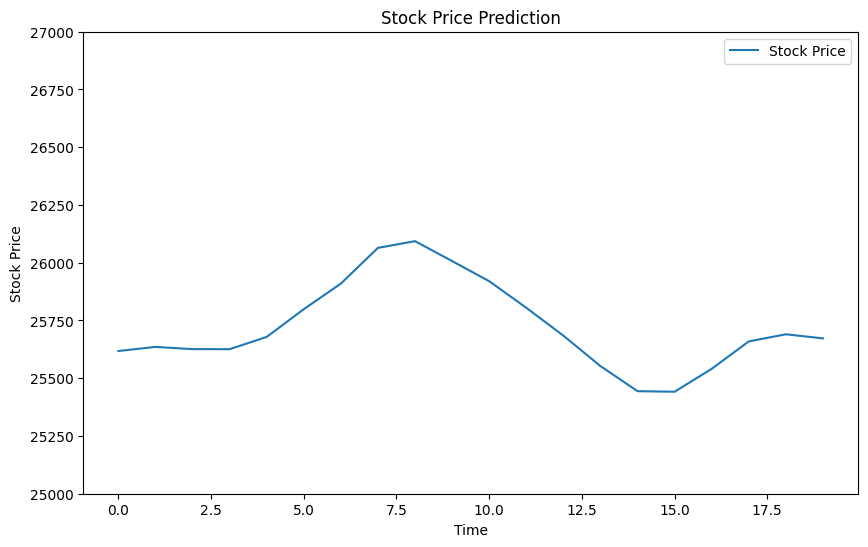

In [68]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[:, 0], label='Stock Price')  # Assumes data is in the second column
plt.ylim(25000, 27000)  # Set y-axis range

# Labeling the plot
plt.title('^Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()